# Introduction to Data Science

# Eman Furrukh (21i-1726)

# Assignment #3

In [178]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [179]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl

# Question 1:

              Open    High     Low   Turnover   Close company
Date                                                         
2011-01-03  121.94  121.00  116.80   510969.0  121.94     HBL
2011-01-04  119.49  122.30  119.50   627959.0  119.49     HBL
2011-01-05  121.87  126.45  121.40  1506848.0  121.87     HBL
2011-01-06  124.93  125.89  123.75   773913.0  124.93     HBL
2011-01-07  124.98  126.06  124.69   376749.0  124.98     HBL
...            ...     ...     ...        ...     ...     ...
2021-07-26  129.98  130.45  128.10   607740.0  128.76     HBL
2021-07-27  127.80  131.95  127.80  2267549.0  131.31     HBL
2021-07-28  131.90  131.90  129.55   802489.0  130.80     HBL
2021-07-29  131.00  131.00  128.50   531104.0  128.93     HBL
2021-07-30  129.00  129.47  126.00  2104560.0  126.67     HBL

[2594 rows x 6 columns]


C:\Users\DELL\AppData\Local\Temp\ipykernel_3068\268286751.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(x)


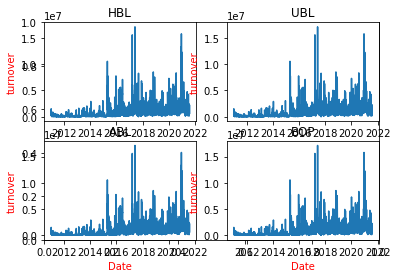

In [250]:
quandl.ApiConfig.api_key = 'k5hpQXTQmkr3f2cBYTDb'
names_of_company = ['HBL']

results = pd.DataFrame()

for names in names_of_company:
    x = quandl.get('PSX/%s' %names, start_date='2011-1-1',
    end_date='2022-5-1')
    x['company'] = names
    results = results.append(x)
    print(results)
#results = plt.subplot()
#results.plot()
#plt.xlabel("Days")
#plt.ylabel("Turnover")
#plt.title("Turnover each day for HBL")
#plt.plot(results = "Turnover")
    
fig, axes = plt.subplots(nrows = 1, ncols =1)
#plt.title("Total Turnover of Stock Being Traded Each Day")
ax1 = fig.add_subplot(221)
ax1.set_title('HBL')
ax1.set_xlabel('Date', fontsize=10, color='r')
ax1.set_ylabel('turnover', fontsize=10 ,color='r')
ax1.set_label('HBL')
ax1.plot(results['Turnover'])

ax2 = fig.add_subplot(222)
ax2.set_title('UBL')
ax2.set_xlabel('Date', fontsize=10, color='r')
ax2.set_ylabel('turnover', fontsize=10, color='r')
ax2.set_label('UBL')
ax2.plot(results['Turnover'])

ax3 = fig.add_subplot(223)
ax3.set_title('ABL')
ax3.set_xlabel('Date', fontsize=10, color='r')
ax3.set_ylabel('turnover', fontsize=10, color='r')
ax3.set_label('ABL')
ax3.plot(results['Turnover'])

ax4 = fig.add_subplot(224)
ax4.set_title('BOP')
ax4.set_xlabel('Date', fontsize=10, color='r')
ax4.set_ylabel('turnover', fontsize=10, color='r')
ax4.set_label('BOP')
ax4.plot(results['Turnover'])

# NOTE : From here on, each question is done on the basis of each Bank.  





# HBL

Question 2:

Text(0.5, 1.0, 'Daily Price Change in Stock for HBL')

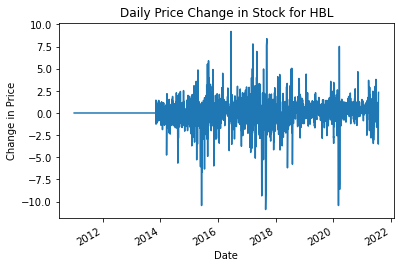

In [241]:
df1 = results["Open"][1:]
df2 = results["Close"]
priceChange = df1 - df2
#print (df1)
#print (df2)
#print(priceChange)
priceChange.plot()
plt.xlabel("Date")
plt.ylabel("Change in Price")
plt.title("Daily Price Change in Stock for HBL")

Question 3:

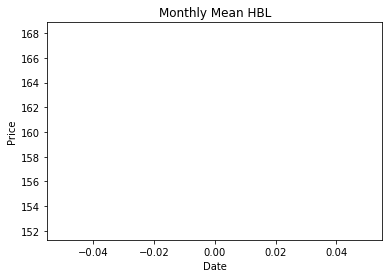

In [182]:
#monthly 
m = results["Close"]
mMean = pd.DataFrame(m)
for i in range(0,2594,31):
    x = m.mean()
    #print(x)
xMean = plt.plot(x)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Monthly Mean HBL")
plt.show()

#df = results
#df.Date = pd.to_datetime(df.Date)
#df_date = df.set_index('Date', inplace = False)
#df_month = df_date.resample('M').mean()
#df_monthly_mean = df_month.groupby(df_daily.index.month).mean()

The yearly mean is:  160.07500385505003


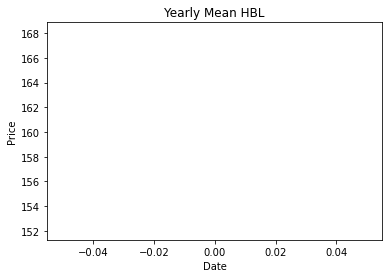

In [183]:
#yearly
y = results["Close"]
yMean = y.mean()
print("The yearly mean is: ", yMean)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Yearly Mean HBL")
p = plt.plot(yMean)

Question 4:

Text(0, 0.5, 'Daily Return')

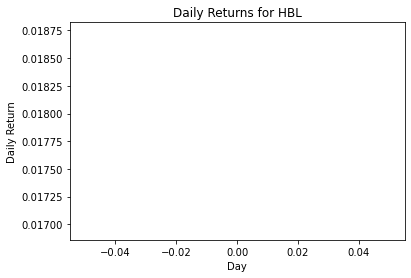

In [184]:
#formula : (previous close/close)-1
i = 0
for i in range(2594):
    df1 = results["Close"][i-1]
    df2 = results["Close"][i]
    #dailyReturn = df1 / df2 - 1
    df = df1 / df2
    dailyReturn = df - 1
    #print(dailyReturn)

plt.plot(dailyReturn)
plt.title("Daily Returns for HBL")
plt.xlabel("Day")
plt.ylabel("Daily Return")

Question 5:

In [185]:
min = 999999999
max = -999999999
for i in range(2594):
    if(df2 < min):
        min = i
    
    if(df2 > max):
        max = i
        
print("Daily Returns: ")
print("Smallest: ", min)
print("Largest: ", max)

Daily Returns: 
Smallest:  0
Largest:  127


Question 6:

Open        4.731714e+01
High        4.799333e+01
Low         4.664750e+01
Turnover    1.336914e+06
Close       4.735509e+01
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_3068\3801304387.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  standardDeviation=results.std()


<AxesSubplot:title={'center':'Standard Deviation for HBL'}, ylabel='Std Dev'>

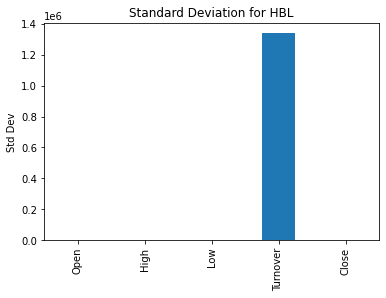

In [231]:
standardDeviation=results.std()
print(standardDeviation)
plt.title("Standard Deviation for HBL")
plt.ylabel("Std Dev")
standardDeviation.plot(kind="bar")

Question 7:

Text(0.5, 1.0, 'Close Price each day for HBL')

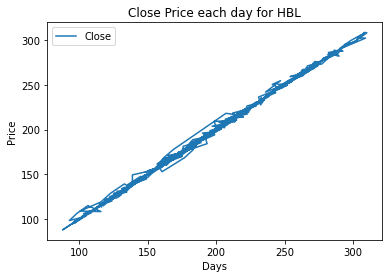

In [186]:
results.plot(0,"Close")
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Close Price each day for HBL")

Question 8:

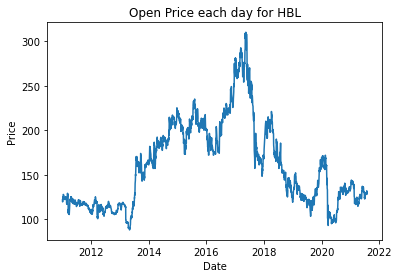

In [187]:
#visualisation 1
plt.plot(results["Open"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Open Price each day for HBL")
plt.show()

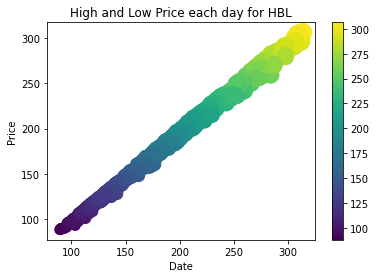

In [188]:
#visualisation 2
#plt.scatter(data['day'], data['tip'], c=data['size'],data['total_bill'])
#plt.scatter(results["High"], results["date"],c=results["date"], s = results["High"])
plt.scatter(results["High"],results["Low"], s=results["High"], c=results["Low"])
plt.colorbar()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("High and Low Price each day for HBL")
plt.show()

In [189]:
#visualisation 3
display(results)

,Open,High,Low,Turnover,Close,company
Date,,,,,,
2011-01-03,121.94,121.00,116.80,510969.0,121.94,HBL
2011-01-04,119.49,122.30,119.50,627959.0,119.49,HBL
2011-01-05,121.87,126.45,121.40,1506848.0,121.87,HBL
2011-01-06,124.93,125.89,123.75,773913.0,124.93,HBL
2011-01-07,124.98,126.06,124.69,376749.0,124.98,HBL
...,...,...,...,...,...,...
2021-07-26,129.98,130.45,128.10,607740.0,128.76,HBL
2021-07-27,127.80,131.95,127.80,2267549.0,131.31,HBL
2021-07-28,131.90,131.90,129.55,802489.0,130.80,HBL


# UBL

Question 1 : DONE ABOVE

Question 2

Text(0.5, 1.0, 'Daily Price Change in Stock for UBL')

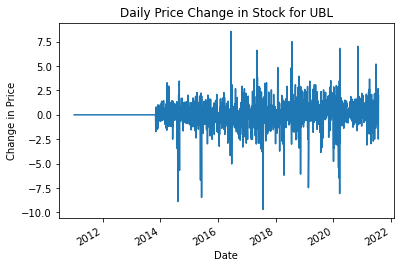

In [191]:
df3 = results1["Open"][1:]
df4 = results1["Close"]
priceChange1 = df3 - df4
#print (df3)
#print (df4)
#print(priceChange1)
priceChange1.plot()
plt.xlabel("Date")
plt.ylabel("Change in Price")
plt.title("Daily Price Change in Stock for UBL")

Question 3

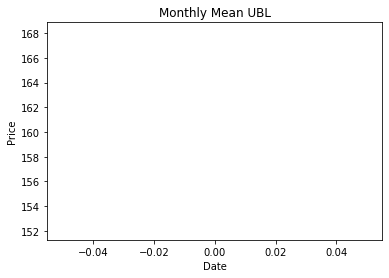

In [192]:
#monthly 
m1 = results["Close"]
mMean1 = pd.DataFrame(m1)
for i in range(0,2594,31):
    x1 = m1.mean()
    #print(x)
xMean1 = plt.plot(x1)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Monthly Mean UBL")
plt.show()

#df = results1
#df.Date = pd.to_datetime(df.Date)
#df_date = df.set_index('Date', inplace = False)
#df_month = df_date.resample('M').mean()
#df_monthly_mean = df_month.groupby(df_daily.index.month).mean()

The yearly mean is:  141.01223978411738


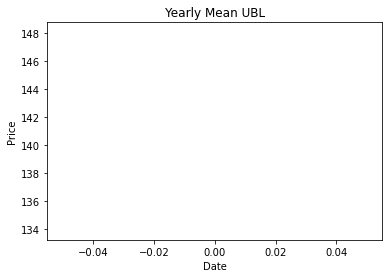

In [193]:
#yearly
y1 = results1["Close"]
yMean1 = y1.mean()
print("The yearly mean is: ", yMean1)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Yearly Mean UBL")
p = plt.plot(yMean1)

Question 4

Text(0, 0.5, 'Daily Return')

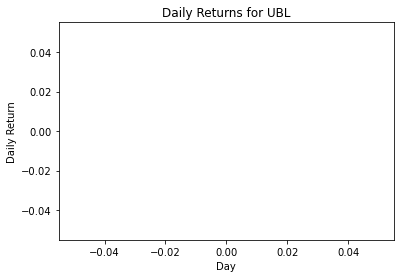

In [194]:
#formula : (previous close/close)-1
i = 0
for i in range(2594):
    df3 = results1["Close"][i-1]
    df4 = results1["Close"][i]
    #dailyReturn = df1 / df2 - 1
    daf = df3 / df4
    dailyReturn1 = daf - 1
    #print(dailyReturn)
    
plt.plot()
plt.title("Daily Returns for UBL")
plt.xlabel("Day")
plt.ylabel("Daily Return")

Question 5

In [195]:
min = 999999999
max = -999999999
for i in range(2594):
    if(df4 < min):
        min = i
    
    if(df4 > max):
        max = i
        
print("Daily Returns: ")
print("Smallest: ", min)
print("Largest: ", max)

Daily Returns: 
Smallest:  0
Largest:  125


Question 6:

Open        4.892043e+01
High        4.953395e+01
Low         4.823229e+01
Turnover    1.595824e+06
Close       4.893320e+01
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_3068\3328815174.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  standardDeviation=results1.std()


<AxesSubplot:title={'center':'Standard Deviation for UBL'}, ylabel='Std Dev'>

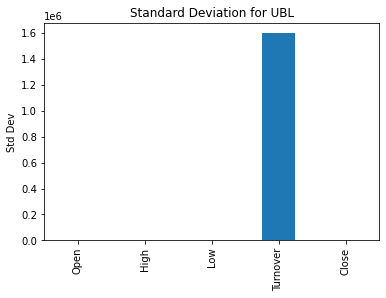

In [230]:
standardDeviation=results1.std()
print(standardDeviation)
plt.title("Standard Deviation for UBL")
plt.ylabel("Std Dev")
standardDeviation.plot(kind="bar")

Question 7

Text(0.5, 1.0, 'Close Price each day for UBL')

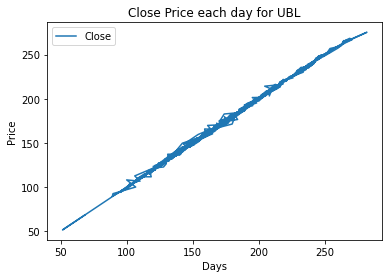

In [196]:
results1.plot(0,"Close")
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Close Price each day for UBL")

Question 8

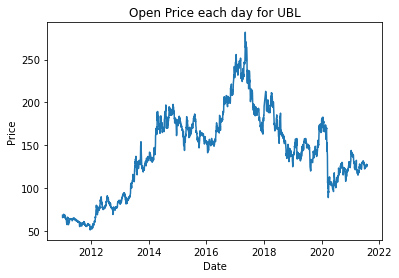

In [197]:
#visualisation 1
plt.plot(results1["Open"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Open Price each day for UBL")
plt.show()

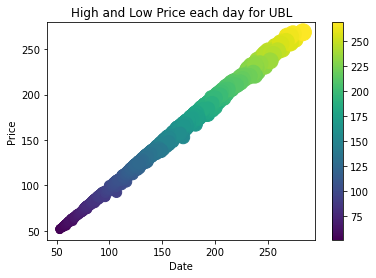

In [198]:
#visualisation 2
#plt.scatter(results["High"], results["date"],c=results["date"], s = results["High"])
plt.scatter(results1["High"],results1["Low"], s=results1["High"], c=results1["Low"])
plt.colorbar()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("High and Low Price each day for UBL")
plt.show()

In [199]:
#visualisation 3
display(results1)

,Open,High,Low,Turnover,Close,company
Date,,,,,,
2011-01-03,68.23,67.94,65.10,2378598.0,68.23,UBL
2011-01-04,65.59,67.10,65.55,3237772.0,65.59,UBL
2011-01-05,66.61,67.70,65.75,2947076.0,66.61,UBL
2011-01-06,65.99,66.80,66.15,1205505.0,65.99,UBL
2011-01-07,66.53,67.60,66.20,1651016.0,66.53,UBL
...,...,...,...,...,...,...
2021-07-26,127.88,127.88,124.50,805954.0,125.18,UBL
2021-07-27,125.00,128.00,124.16,912859.0,127.49,UBL
2021-07-28,127.50,127.79,126.53,542118.0,127.01,UBL


# ABL

Question 1 : DONE ABOVE

Question 2

Text(0.5, 1.0, 'Daily Price Change in Stock for ABL')

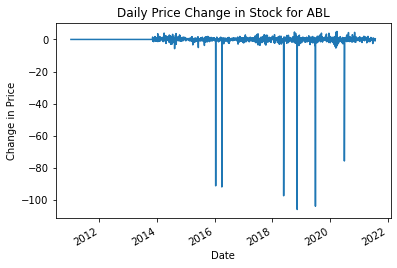

In [201]:
df5 = results2["Open"][1:]
df6 = results2["Close"]
priceChange2 = df5 - df6
#print (df5)
#print (df6)
#print(priceChange2)
priceChange2.plot()
plt.xlabel("Date")
plt.ylabel("Change in Price")
plt.title("Daily Price Change in Stock for ABL")

Question 3

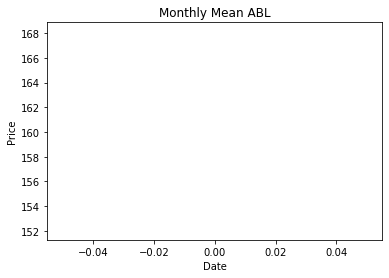

In [202]:
#monthly 
m2 = results["Close"]
mMean2 = pd.DataFrame(m2)
for i in range(0,2594,31):
    x2 = m2.mean()
    #print(x)
xMean2 = plt.plot(x2)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Monthly Mean ABL")
plt.show()

#df = results1
#df.Date = pd.to_datetime(df.Date)
#df_date = df.set_index('Date', inplace = False)
#df_month = df_date.resample('M').mean()
#df_monthly_mean = df_month.groupby(df_daily.index.month).mean()

The yearly mean is:  88.01376360808727


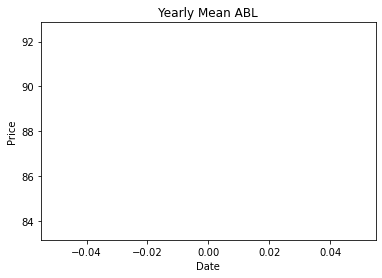

In [203]:
#yearly
y2 = results2["Close"]
yMean2 = y2.mean()
print("The yearly mean is: ", yMean2)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Yearly Mean ABL")
p = plt.plot(yMean2)

Question 4

Text(0, 0.5, 'Daily Return')

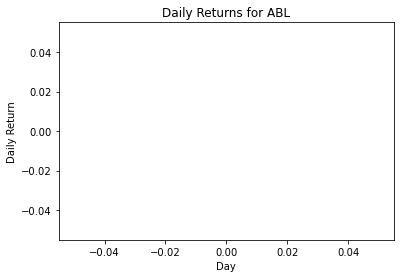

In [204]:
#formula : (previous close/close)-1
i = 0
for i in range(2572):
    df5 = results2["Close"][i-1]
    df6 = results2["Close"][i]
    #dailyReturn = df5 / df6 - 1
    datf = df5 / df6
    dailyReturn2 = datf - 1
    #print(dailyReturn2)
    
plt.plot()
plt.title("Daily Returns for ABL")
plt.xlabel("Day")
plt.ylabel("Daily Return")

Question 5

In [205]:
min = 999999999
max = -999999999
for i in range(2594):
    if(df6 < min):
        min = i
    
    if(df6 > max):
        max = i
        
print("Daily Returns: ")
print("Smallest: ", min)
print("Largest: ", max)

Daily Returns: 
Smallest:  0
Largest:  73


Question 6:

Open            18.187056
High            17.850871
Low             17.532759
Turnover    347589.501669
Close           17.616798
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_3068\2500805606.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  standardDeviation=results2.std()


<AxesSubplot:title={'center':'Standard Deviation for ABL'}, ylabel='Std Dev'>

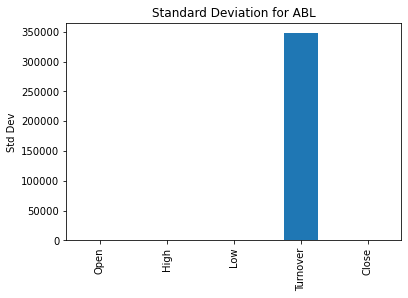

In [229]:
standardDeviation=results2.std()
print(standardDeviation)
plt.title("Standard Deviation for ABL")
plt.ylabel("Std Dev")
standardDeviation.plot(kind="bar")

Question 7

Text(0.5, 1.0, 'Close Price each day for ABL')

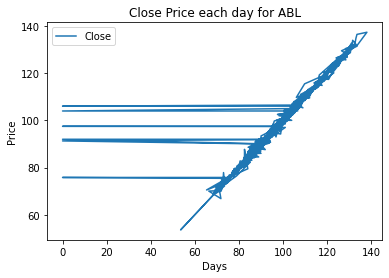

In [206]:
results2.plot(0,"Close")
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Close Price each day for ABL")

Question 8

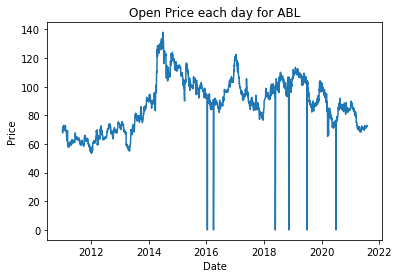

In [207]:
#visualisation 1
plt.plot(results2["Open"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Open Price each day for ABL")
plt.show()

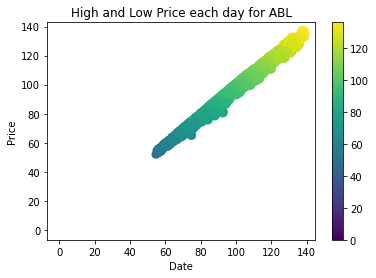

In [208]:
#visualisation 2
#plt.scatter(results["High"],results["date"] ,c=results["date"], s = results["High"])
plt.scatter(results2["High"],results2["Low"], s=results2["High"], c=results2["Low"])
plt.colorbar()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("High and Low Price each day for ABL")
plt.show()

In [209]:
#visualisation 3
display(results2)

,Open,High,Low,Turnover,Close,company
Date,,,,,,
2011-01-03,70.15,70.00,67.40,127600.0,70.15,ABL
2011-01-04,67.83,71.22,68.45,585236.0,67.83,ABL
2011-01-05,70.77,72.99,70.01,1200042.0,70.77,ABL
2011-01-06,71.82,72.80,71.50,708497.0,71.82,ABL
2011-01-07,71.75,72.06,71.35,168166.0,71.75,ABL
...,...,...,...,...,...,...
2021-07-26,71.99,72.00,71.85,233000.0,71.85,ABL
2021-07-27,71.99,73.10,71.75,86500.0,73.00,ABL
2021-07-28,73.01,73.73,72.50,99000.0,73.01,ABL


# BOP

QUESTION 1 DONE ABOVE

Question 2

Text(0.5, 1.0, 'Daily Price Change in Stock for BOP')

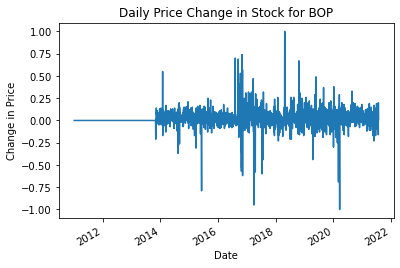

In [211]:
df7 = results3["Open"][1:]
df8 = results3["Close"]
priceChange3 = df7 - df8
#print (df7)
#print (df7)
#print(priceChange3)
priceChange3.plot()
plt.xlabel("Date")
plt.ylabel("Change in Price")
plt.title("Daily Price Change in Stock for BOP")

Question 3

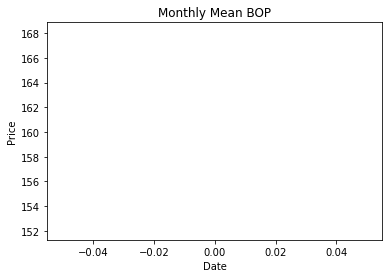

In [212]:
#monthly 
m3 = results["Close"]
mMean3 = pd.DataFrame(m3)
for i in range(0,2594,31):
    x3 = m3.mean()
    #print(x)
xMean3 = plt.plot(x3)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Monthly Mean BOP")
plt.show()

#df = results1
#df.Date = pd.to_datetime(df.Date)
#df_date = df.set_index('Date', inplace = False)
#df_month = df_date.resample('M').mean()
#df_monthly_mean = df_month.groupby(df_daily.index.month).mean()

The yearly mean is:  9.903138010794132


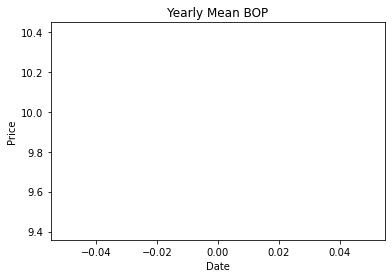

In [213]:
#yearly
y3 = results3["Close"]
yMean3 = y3.mean()
print("The yearly mean is: ", yMean3)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Yearly Mean BOP")
p = plt.plot(yMean3)

Question 4

Text(0, 0.5, 'Daily Return')

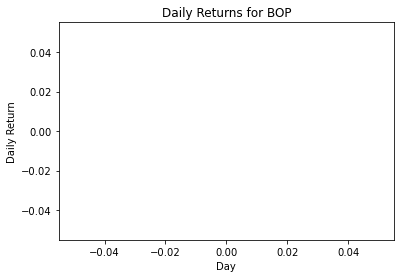

In [214]:
#formula : (previous close/close)-1
i = 0
for i in range(2594):
    df7 = results3["Close"][i-1]
    df8 = results3["Close"][i]
    #dailyReturn = df7 / df8 - 1
    dataf = df7 / df8
    dailyReturn3 = dataf - 1
    #print(dailyReturn3)
    
plt.plot()
plt.title("Daily Returns for BOP")
plt.xlabel("Day")
plt.ylabel("Daily Return")

Question 5

In [215]:
min = 999999999
max = -999999999
for i in range(2594):
    if(df8 < min):
        min = i
    
    if(df8 > max):
        max = i
        
print("Daily Returns: ")
print("Smallest: ", min)
print("Largest: ", max)

Daily Returns: 
Smallest:  0
Largest:  9


Question 6

Open        2.613146e+00
High        2.658568e+00
Low         2.546292e+00
Turnover    1.091122e+07
Close       2.601047e+00
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_3068\2237102357.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  standardDeviation=results3.std()


<AxesSubplot:title={'center':'Standard Deviation for BOP'}, ylabel='Std Dev'>

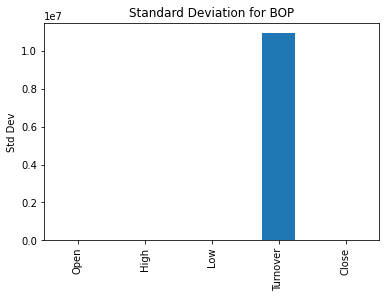

In [228]:
standardDeviation=results3.std()
print(standardDeviation)
plt.title("Standard Deviation for BOP")
plt.ylabel("Std Dev")
standardDeviation.plot(kind="bar")

Question 7

Text(0.5, 1.0, 'Close Price each day for BOP')

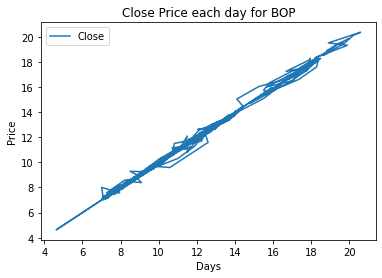

In [216]:
results3.plot(0,"Close")
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Close Price each day for BOP")

Question 8

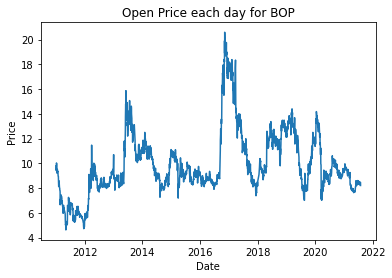

In [217]:
#visualisation 1
plt.plot(results3["Open"])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Open Price each day for BOP")
plt.show()

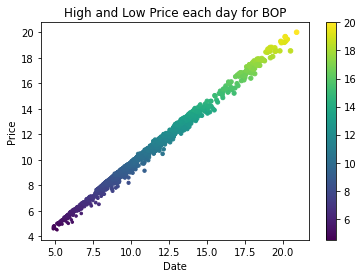

In [218]:
#visualisation 2
#plt.scatter(results["High"], results["Date"],c=results["date"], s = results["High"])
plt.scatter(results3["High"],results3["Low"], s=results3["High"], c=results3["Low"])
plt.colorbar()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("High and Low Price each day for BOP")
plt.show()

In [219]:
#visualisation 3
display(results3)

,Open,High,Low,Turnover,Close,company
Date,,,,,,
2011-01-03,9.81,9.70,9.40,1365630.0,9.81,BOP
2011-01-04,9.42,9.69,9.35,826201.0,9.42,BOP
2011-01-05,9.65,10.06,9.61,2712097.0,9.65,BOP
2011-01-06,9.84,10.21,9.91,3331121.0,9.84,BOP
2011-01-07,10.03,10.15,9.85,954110.0,10.03,BOP
...,...,...,...,...,...,...
2021-07-26,8.26,8.35,8.17,1538000.0,8.21,BOP
2021-07-27,8.25,8.60,8.20,10885500.0,8.41,BOP
2021-07-28,8.48,8.48,8.25,2241000.0,8.28,BOP
